## Problem Statement:
### To predict the price of a new property using Ames Housing Dataset

## Executive Summary:
### To help provide certainty in price prediction for the  stakeholders, I will develop and pick the best Regression models from Linear, Lasso and Ridge, to uncover variables that have a strong influence on price and are capable of predicting future values. 
**There is no readme.md file as I did not create any special functions or variables**

In [2099]:
# import the packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler


%matplotlib inline

In [2100]:
# Read in the data
train_df = pd.read_csv('./datasets/train.csv')
test_df = pd.read_csv('./datasets/test.csv')

In [2101]:
# check the shape
train_df.shape

(2051, 81)

In [2102]:
# Test dataframe has 1 less column
test_df.shape

(879, 80)

In [2103]:
# Check the data
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [2104]:
# Check the data - 1 less column is SalePrice
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [2105]:
test_df.tail()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
874,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,PosN,Norm,1Fam,2Story,6,6,1974,1974,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,931,LwQ,153,0,1084,GasA,TA,Y,SBrkr,1084,793,0,1877,1,0,2,1,4,1,TA,8,Typ,1,TA,Attchd,1974.0,Unf,2,488,TA,TA,Y,0,96,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD
875,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,2Story,6,7,1966,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,410.0,Gd,Gd,CBlock,TA,TA,No,BLQ,575,Unf,0,529,1104,GasA,Ex,Y,SBrkr,1104,884,0,1988,0,0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,1966.0,RFn,2,480,TA,TA,Y,0,230,0,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
876,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,250,LwQ,492,210,952,GasA,Ex,Y,SBrkr,1211,0,0,1211,0,0,1,0,3,1,TA,5,Typ,1,TA,Attchd,1968.0,Unf,1,322,TA,TA,Y,0,63,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD
877,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,TA,TA,No,ALQ,616,Unf,0,248,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1974.0,Unf,2,528,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,5,2007,WD
878,1939,535327160,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1955,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,BLQ,793,Unf,0,130,923,GasA,TA,Y,SBrkr,925,0,0,925,1,0,1,0,3,1,TA,5,Typ,2,TA,Attchd,1955.0,Unf,1,390,TA,TA,Y,81,0,0,0,0,0,NaN,GdWo,NaN,0,3,2007,WD


In [2106]:
#Check the data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [2107]:
# Check if ames_df['SalePrice'] have any 0
train_df[train_df['SalePrice'] == 0]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [2108]:
# Assign test_df['Sale Price'] to be Integer 0 for merging of 2 datasets and to use it as an identifier for splitting and extraction after cleaning 
test_df['SalePrice'] = 0

In [2109]:
# Check the data in SalePrice
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD,0
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,0
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,0
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD,0
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD,0


In [2110]:
# Combine the ames and the test data for cleaning
combined_df = pd.concat([train_df, test_df], axis=0)

In [2111]:
# Reset the index for easy viewing
combined_df.reset_index(drop=True, inplace=True)

In [2112]:
# Check the dataframe
combined_df

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,PosN,Norm,1Fam,2Story,6,6,1974,1974,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,931.0,LwQ,153.0,0.0,1084.0,GasA,TA,Y,SBrkr,1084,793,0,1877,1.0,0.0,2,1,4,1,TA,8,Typ,1,TA,Attchd,1974.0,Unf,2.0,488.0,TA,TA,Y,0,96,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD,0
2926,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,2Story,6,7,1966,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,410.0,Gd,Gd,CBlock,TA,TA,No,BLQ,575.0,Unf,0.0,529.0,1104.0,GasA,Ex,Y,SBrkr,1104,884,0,1988,0.0,0.0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,1966.0,RFn,2.0,480.0,TA,TA,Y,0,230,0,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD,0
2927,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,250.0,LwQ,492.0,210.0,952.0,GasA,Ex,Y,SBrkr,1211,0,0,1211,0.0,0.0,1,0,3,1,TA,5,Typ,1,TA,Attchd,1968.0,Unf,1.0,322.0,TA,TA,Y,0,63,0,0,0,0,NaN,

In [2113]:
# Check the data types with the data dictionary
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [2114]:
# Check for null values - unable to see middle columns
combined_df.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    490
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [2115]:
# Use this method to see all null values in columns
null_columns = combined_df.columns[combined_df.isnull().any()]
combined_df[null_columns].isnull().sum()

Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

In [2116]:
# Impute all missing values in numeric variables with their mean
combined_df.fillna(combined_df.mean(), inplace=True)

In [2117]:
# Check for columns with null values
combined_df[null_columns].isnull().sum()

Lot Frontage         0
Alley             2732
Mas Vnr Type        23
Mas Vnr Area         0
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         0
BsmtFin Type 2      81
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Electrical           1
Bsmt Full Bath       0
Bsmt Half Bath       0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt        0
Garage Finish      159
Garage Cars          0
Garage Area          0
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

In [2118]:
# Fill the rest of the ordinal and nominal columns with the string NA
combined_df.fillna('NA', inplace=True)

In [2119]:
# Check for columns with null values
combined_df[null_columns].isnull().sum()

Lot Frontage      0
Alley             0
Mas Vnr Type      0
Mas Vnr Area      0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Electrical        0
Bsmt Full Bath    0
Bsmt Half Bath    0
Fireplace Qu      0
Garage Type       0
Garage Yr Blt     0
Garage Finish     0
Garage Cars       0
Garage Area       0
Garage Qual       0
Garage Cond       0
Pool QC           0
Fence             0
Misc Feature      0
dtype: int64

In [2120]:
# Check data series for str 'NA'
combined_df['Alley'].value_counts()

NA      2732
Grvl     120
Pave      78
Name: Alley, dtype: int64

In [2121]:
# I will now group the variables according their types in the data dictionary

|Numeric Variables||Ordinal Variables|Categorical Variables||
|---|---|---|---|---|
| Lot Frontage   |   | Lot Shape  | PID  | Mas Vnr Type  |
| Lot Area  |   |Utilities   | MS SubClass  | Foundation  |
| Year Built (Discrete)  |   | Land Slope  | MS Zoning   | Heating |
| Year Remod/Add (Discrete) |   | Overall Qual  | Street  | Central Air |
| Mas Vnr Area  |   | Overall Cond   | Alley  | House Style  |
| BsmtFin SF 1  |   | Exter Qual  | Land Contour   | Garage Type |
| BsmtFin SF 2  |   | Exter Cond  | Lot Config  | Roof Matl  |
| Bsmt Unf SF  |   | Bsmt Qual  | Neighborhood   | Misc Feature |
| Total Bsmt SF |   | Bsmt Cond  | Condition 1 | Sale Type |
| 1st Flr SF |   | Bsmt Exposure  | Condition 2 | Roof Style  |
| 2nd Flr SF  |   | BsmtFin Type 1  | Bldg Type   | Id |
| Low Qual Fin SF |   | BsmtFinType 2  | Exterior 1 | Exterior 2 |
| Gr Liv Area |   | Heating QC  |   |  |
| Garage Yr Blt (Discrete) |   | Electrical |  |  |
| Garage Area  |   | Kitchen Qual  |   |  |
| Wood Deck SF  |   | Functional  |   |   |
| Open Porch SF |   | Fireplace Qu  |   |  |
| Enclosed Porch  |   | Garage Finish  |   |  |
| 3-Ssn Porch  |   | Garage Qual  |   |   |
| Screen Porch |   | Garage Cond  |   |   |
| Pool Area  |   | Paved Drive  |   |   |
| Misc Val  |   | Pool QC  |   |   |
| SalePrice  |   | Fence  |   |   |
| Bsmt Half Bath (Discrete)|
| Full Bath (Discrete) |
| Half Bath (Discrete) |
| Kitchen (Discrete)  |
| Fireplaces (Discrete) |
| Garage Cars (Discrete) |
| TotRmsAbvGrd (Discrete) |

In [2122]:
# Assign Lot shape with order numbers
combined_df['Lot Shape'] = combined_df['Lot Shape'].map({'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1})

In [2123]:
# Check the data series for values assigned
combined_df['Lot Shape'].value_counts()

4    1859
3     979
2      76
1      16
Name: Lot Shape, dtype: int64

In [2124]:
# Assign Utilities with order numbers
combined_df['Utilities'] = combined_df['Utilities'].map({'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1})

In [2125]:
# Check the data series for values assigned
combined_df['Utilities'].value_counts()

4    2927
3       2
2       1
Name: Utilities, dtype: int64

In [2126]:
# Assign Land Slope with order numbers
combined_df['Land Slope'] = combined_df['Land Slope'].map({'Gtl': 3, 'Mod': 2, 'Sev': 1})

In [2127]:
# Check the data series for values assigned
combined_df['Land Slope'].value_counts()

3    2789
2     125
1      16
Name: Land Slope, dtype: int64

In [2128]:
# Assign Exter Qual with order numbers
combined_df['Exter Qual'] = combined_df['Exter Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1})

In [2129]:
# Check the data series for values assigned
combined_df['Exter Qual'].value_counts()

3    1799
4     989
5     107
2      35
Name: Exter Qual, dtype: int64

In [2130]:
# Assign Exter Cond with order numbers
combined_df['Exter Cond'] = combined_df['Exter Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1})

In [2131]:
# Check the data series for values assigned
combined_df['Exter Cond'].value_counts()

3    2549
4     299
2      67
5      12
1       3
Name: Exter Cond, dtype: int64

In [2132]:
# Assign Bsmt Qual with order numbers
combined_df['Bsmt Qual'] = combined_df['Bsmt Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})

In [2133]:
# Check the data series for values assigned
combined_df['Bsmt Qual'].value_counts()

3    1283
4    1219
5     258
2      88
0      80
1       2
Name: Bsmt Qual, dtype: int64

In [2134]:
# Assign Bsmt Cond with order numbers
combined_df['Bsmt Cond'] = combined_df['Bsmt Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})

In [2135]:
# Check the data series for values assigned
combined_df['Bsmt Cond'].value_counts()

3    2616
4     122
2     104
0      80
1       5
5       3
Name: Bsmt Cond, dtype: int64

In [2136]:
# Assign Bsmt Exposure with order numbers
combined_df['Bsmt Exposure'] = combined_df['Bsmt Exposure'].map({'Gd': 4, 'Av': 3, 'Mn':2, 'No':1, 'NA':0})

In [2137]:
# Check the data series for values assigned
combined_df['Bsmt Exposure'].value_counts()

1    1906
3     418
4     284
2     239
0      83
Name: Bsmt Exposure, dtype: int64

In [2138]:
# Assign BsmtFin Type 1 with order numbers
combined_df['BsmtFin Type 1'] = combined_df['BsmtFin Type 1'].map({'GLD': 6, 'ALQ': 5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})

In [2139]:
# Check the data series for values assigned
combined_df['BsmtFin Type 1'].value_counts()

1.0    851
5.0    429
3.0    288
4.0    269
2.0    154
0.0     80
Name: BsmtFin Type 1, dtype: int64

In [2140]:
# Assign BsmtFin Type 2 with order numbers
combined_df['BsmtFin Type 2'] = combined_df['BsmtFin Type 2'].map({'GLD': 6, 'ALQ': 5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})

In [2141]:
# Check the data series for values assigned
combined_df['BsmtFin Type 1'].value_counts()

1.0    851
5.0    429
3.0    288
4.0    269
2.0    154
0.0     80
Name: BsmtFin Type 1, dtype: int64

In [2142]:
# Assign HeatingQC Type 2 with order numbers
combined_df['Heating QC'] = combined_df['Heating QC'].map({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1})

In [2143]:
# Check the data series for values assigned
combined_df['Heating QC'].value_counts()

5    1495
3     864
4     476
2      92
1       3
Name: Heating QC, dtype: int64

In [2144]:
# Assign Electrical with order numbers
combined_df['Electrical'] = combined_df['Electrical'].map({'SBrkr': 4, 'FuseA': 3, 'FuseF':2, 'FuseP':1, 'Mix':0})

In [2145]:
# Check the data series for values assigned
combined_df['Electrical'].value_counts()

4.0    2682
3.0     188
2.0      50
1.0       8
0.0       1
Name: Electrical, dtype: int64

In [2146]:
# Assign Kitchen Qual with order numbers
combined_df['Kitchen Qual'] = combined_df['Kitchen Qual'].map({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1})

In [2147]:
# Check the data series for values assigned
combined_df['Kitchen Qual'].value_counts()

3    1494
4    1160
5     205
2      70
1       1
Name: Kitchen Qual, dtype: int64

In [2148]:
# Assign Functional with order numbers
combined_df['Functional'] = combined_df['Functional'].map({'Typ': 8, 'Min1': 7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1})

In [2149]:
# Check the data series for values assigned
combined_df['Functional'].value_counts()

8    2728
6      70
7      65
5      35
4      19
3       9
1       2
2       2
Name: Functional, dtype: int64

In [2150]:
# Assign Fireplace Qu with order numbers
combined_df['Fireplace Qu'] = combined_df['Fireplace Qu'].map({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})

In [2151]:
# Check the data series for values assigned
combined_df['Fireplace Qu'].value_counts()

0    1422
4     744
3     600
2      75
1      46
5      43
Name: Fireplace Qu, dtype: int64

In [2152]:
# Assign Garage Finish with order numbers
combined_df['Garage Finish'] = combined_df['Garage Finish'].map({'Fin': 3, 'RFn': 2, 'Unf':1, 'NA': 0})

In [2153]:
# Check the data series for values assigned
combined_df['Garage Finish'].value_counts()

1    1231
2     812
3     728
0     159
Name: Garage Finish, dtype: int64

In [2154]:
# Assign Garage Qual with order numbers
combined_df['Garage Qual'] = combined_df['Garage Qual'].map({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po':1, 'NA':0})

In [2155]:
# Check the data series for values assigned
combined_df['Garage Qual'].value_counts()

3    2615
0     159
2     124
4      24
1       5
5       3
Name: Garage Qual, dtype: int64

In [2156]:
# Assign Garage Cond with order numbers
combined_df['Garage Cond'] = combined_df['Garage Cond'].map({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa': 2, 'Po':1, 'NA':0})

In [2157]:
# Check the data series for values assigned
combined_df['Garage Cond'].value_counts()

3    2665
0     159
2      74
4      15
1      14
5       3
Name: Garage Cond, dtype: int64

In [2158]:
# Assign Paved Drive with order numbers
combined_df['Paved Drive'] = combined_df['Paved Drive'].map({'Y': 3, 'P': 2, 'N':1})

In [2159]:
# Check the data series for values assigned
combined_df['Paved Drive'].value_counts()

3    2652
1     216
2      62
Name: Paved Drive, dtype: int64

In [2160]:
# Assign Pool QC with order numbers
combined_df['Pool QC'] = combined_df['Pool QC'].map({'Ex': 4, 'Gd': 3, 'TA':2, 'Fa':1, 'NA':0})

In [2161]:
# Check the data series for values assigned
combined_df['Pool QC'].value_counts()

0    2917
3       4
4       4
2       3
1       2
Name: Pool QC, dtype: int64

In [2162]:
# Assign Fence with order numbers
combined_df['Fence'] = combined_df['Fence'].map({'GdPrv': 4, 'MnPrv': 3, 'GdWo':2, 'MnWw':1, 'NA':0})

In [2163]:
# Check the data series for values assigned
combined_df['Fence'].value_counts()

0    2358
3     330
4     118
2     112
1      12
Name: Fence, dtype: int64

In [2164]:
# Display all 81 columns
pd.options.display.max_columns = 81

In [2165]:
# Split back and assign test data
test_df = pd.DataFrame(combined_df.loc[combined_df['SalePrice']==0])

In [2166]:
# Check dataframe
test_df

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
2051,2658,902301120,190,RM,69.00000,9142,Pave,Grvl,4,Lvl,4,Inside,3,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,Stone,2,3,1,1.0,0.0,1.0,0.0,1020.0,1020.0,GasA,4,N,1.0,908,1020,0,1928,0.0,0.0,2,0,4,2,2,9,8,0,0,Detchd,1910.0,1,1.0,440.0,1,1,3,0,60,112,0,0,0,0,0,NA,0,4,2006,WD,0
2052,2718,905108090,90,RL,69.22459,9662,Pave,NA,3,Lvl,4,Inside,3,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,4,3,1,1.0,0.0,1.0,0.0,1967.0,1967.0,GasA,3,Y,4.0,1967,0,0,1967,0.0,0.0,2,0,6,2,3,10,8,0,0,Attchd,1977.0,3,2.0,580.0,3,3,3,170,0,0,0,0,0,0,0,NA,0,8,2006,WD,0
2053,2414,528218130,60,RL,58.00000,17104,Pave,NA,3,Lvl,4,Inside,3,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,4,3,NaN,554.0,1.0,0.0,100.0,654.0,GasA,5,Y,4.0,664,832,0,1496,1.0,0.0,2,1,3,1,4,7,8,1,4,Attchd,2006.0,2,2.0,426.0,3,3,3,100,24,0,0,0,0,0,0,NA,0,9,2006,New,0
2054,1989,902207150,30,RM,60.00000,8520,Pave,NA,4,Lvl,4,Inside,3,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,4,3,CBlock,3,3,1,1.0,0.0,1.0,0.0,968.0,968.0,GasA,3,Y,4.0,968,0,0,968,0.0,0.0,1,0,2,1,3,5,8,0,0,Detchd,1935.0,1,2.0,480.0,2,3,1,0,0,184,0,0,0,0,0,NA,0,7,2007,WD,0
2055,625,535105100,20,RL,69.22459,9500,Pave,NA,3,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,3,CBlock,4,3,1,4.0,609.0,1.0,0.0,785.0,1394.0,GasA,4,Y,4.0,1394,0,0,1394,1.0,0.0,1,1,3,1,3,6,8,2,4,Attchd,1963.0,2,2.0,514.0,3,3,3,0,76,0,0,185,0,0,0,NA,0,7,2009,WD,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1662,527377110,60,RL,80.00000,8000,Pave,NA,4,Lvl,4,Inside,3,NWAmes,PosN,Norm,1Fam,2Story,6,6,1974,1974,Gable,CompShg,HdBoard,HdBoard,None,0.0,3,3,CBlock,3,3,1,5.0,931.0,2.0,153.0,0.0,1084.0,GasA,3,Y,4.0,1084,793,0,1877,1.0,0.0,2,1,4,1,3,8,8,1,3,Attchd,1974.0,1,2.0,488.0,3,3,3,0,96,0,0,0,0,0,0,NA,0,11,2007,WD,0
2926,1234,535126140,60,RL,90.00000,14670,Pave,NA,4,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,2Story,6,7,1966,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,410.0,4,4,CBlock,3,3,1,4.0,575.0,1.0,0.0,529.0,1104.0,GasA,5,Y,4.0,1104,884,0,1988,0.0,0.0,2,1,4,1,4,9,8,1,4,Attchd,1966.0,2,2.0,480.0,3,3,3,0,230,0,0,0,0,0,3,NA,0,8,2008,WD,0
2927,1373,904100040,20,RL,55.00000,8250,Pave,NA,4,Lvl,4,Inside,3,Sawyer,Feedr,Norm,1Fam,1Story,5,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,3,3,CBlock,3,3,1,4.0,250.0,2.0,492.0,210.0,952.0,GasA,5,Y,4.0,1211,0,0,1211,0.0,0.0,1,0,3,1,3,5,8,1,3,Attchd,1968.0,1,1.0,322.0,3,3,3,0,63,0,0,0,0,0,0,NA,0,8,2008,WD,0
2928,1672,527425140,20,RL,60.00000,9000,Pave,NA,4,Lvl,4,FR2,3,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,3,3,PConc,3,3,1,5.0,616.0,1.0,0.0,248.0,864.0,GasA,3,Y,4

In [2167]:
# Drop the SalePrice column and check dataframe
test_df.drop(['SalePrice'], axis=1, inplace=True)
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
2051,2658,902301120,190,RM,69.00000,9142,Pave,Grvl,4,Lvl,4,Inside,3,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,Stone,2,3,1,1.0,0.0,1.0,0.0,1020.0,1020.0,GasA,4,N,1.0,908,1020,0,1928,0.0,0.0,2,0,4,2,2,9,8,0,0,Detchd,1910.0,1,1.0,440.0,1,1,3,0,60,112,0,0,0,0,0,NA,0,4,2006,WD
2052,2718,905108090,90,RL,69.22459,9662,Pave,NA,3,Lvl,4,Inside,3,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,4,3,1,1.0,0.0,1.0,0.0,1967.0,1967.0,GasA,3,Y,4.0,1967,0,0,1967,0.0,0.0,2,0,6,2,3,10,8,0,0,Attchd,1977.0,3,2.0,580.0,3,3,3,170,0,0,0,0,0,0,0,NA,0,8,2006,WD
2053,2414,528218130,60,RL,58.00000,17104,Pave,NA,3,Lvl,4,Inside,3,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,4,3,NaN,554.0,1.0,0.0,100.0,654.0,GasA,5,Y,4.0,664,832,0,1496,1.0,0.0,2,1,3,1,4,7,8,1,4,Attchd,2006.0,2,2.0,426.0,3,3,3,100,24,0,0,0,0,0,0,NA,0,9,2006,New
2054,1989,902207150,30,RM,60.00000,8520,Pave,NA,4,Lvl,4,Inside,3,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,4,3,CBlock,3,3,1,1.0,0.0,1.0,0.0,968.0,968.0,GasA,3,Y,4.0,968,0,0,968,0.0,0.0,1,0,2,1,3,5,8,0,0,Detchd,1935.0,1,2.0,480.0,2,3,1,0,0,184,0,0,0,0,0,NA,0,7,2007,WD
2055,625,535105100,20,RL,69.22459,9500,Pave,NA,3,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,3,CBlock,4,3,1,4.0,609.0,1.0,0.0,785.0,1394.0,GasA,4,Y,4.0,1394,0,0,1394,1.0,0.0,1,1,3,1,3,6,8,2,4,Attchd,1963.0,2,2.0,514.0,3,3,3,0,76,0,0,185,0,0,0,NA,0,7,2009,WD


In [2168]:
# Split back and assign train data
train_df = pd.DataFrame(combined_df.loc[combined_df['SalePrice']!=0])

In [2169]:
# Check dataframe
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,69.22459,13517,Pave,NA,3,Lvl,4,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,NaN,533.0,1.0,0.0,192.0,725.0,GasA,5,Y,4.0,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0,Attchd,1976.0,2,2.0,475.0,3,3,3,0,44,0,0,0,0,0,0,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.00000,11492,Pave,NA,3,Lvl,4,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,NaN,637.0,1.0,0.0,276.0,913.0,GasA,5,Y,4.0,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,1,3,Attchd,1997.0,2,2.0,559.0,3,3,3,0,74,0,0,0,0,0,0,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.00000,7922,Pave,NA,4,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,1,NaN,731.0,1.0,0.0,326.0,1057.0,GasA,3,Y,4.0,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,8,0,0,Detchd,1953.0,1,1.0,246.0,3,3,3,0,52,0,0,0,0,0,0,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.00000,9802,Pave,NA,4,Lvl,4,Inside,3,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1.0,0.0,1.0,0.0,384.0,384.0,GasA,4,Y,4.0,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,8,0,0,BuiltIn,2007.0,3,2.0,400.0,3,3,3,100,0,0,0,0,0,0,0,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.00000,14235,Pave,NA,3,Lvl,4,Inside,3,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,1,1.0,0.0,1.0,0.0,676.0,676.0,GasA,3,Y,4.0,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,8,0,0,Detchd,1957.0,1,2.0,484.0,3,3,1,0,59,0,0,0,0,0,0,NA,0,3,2010,WD,138500


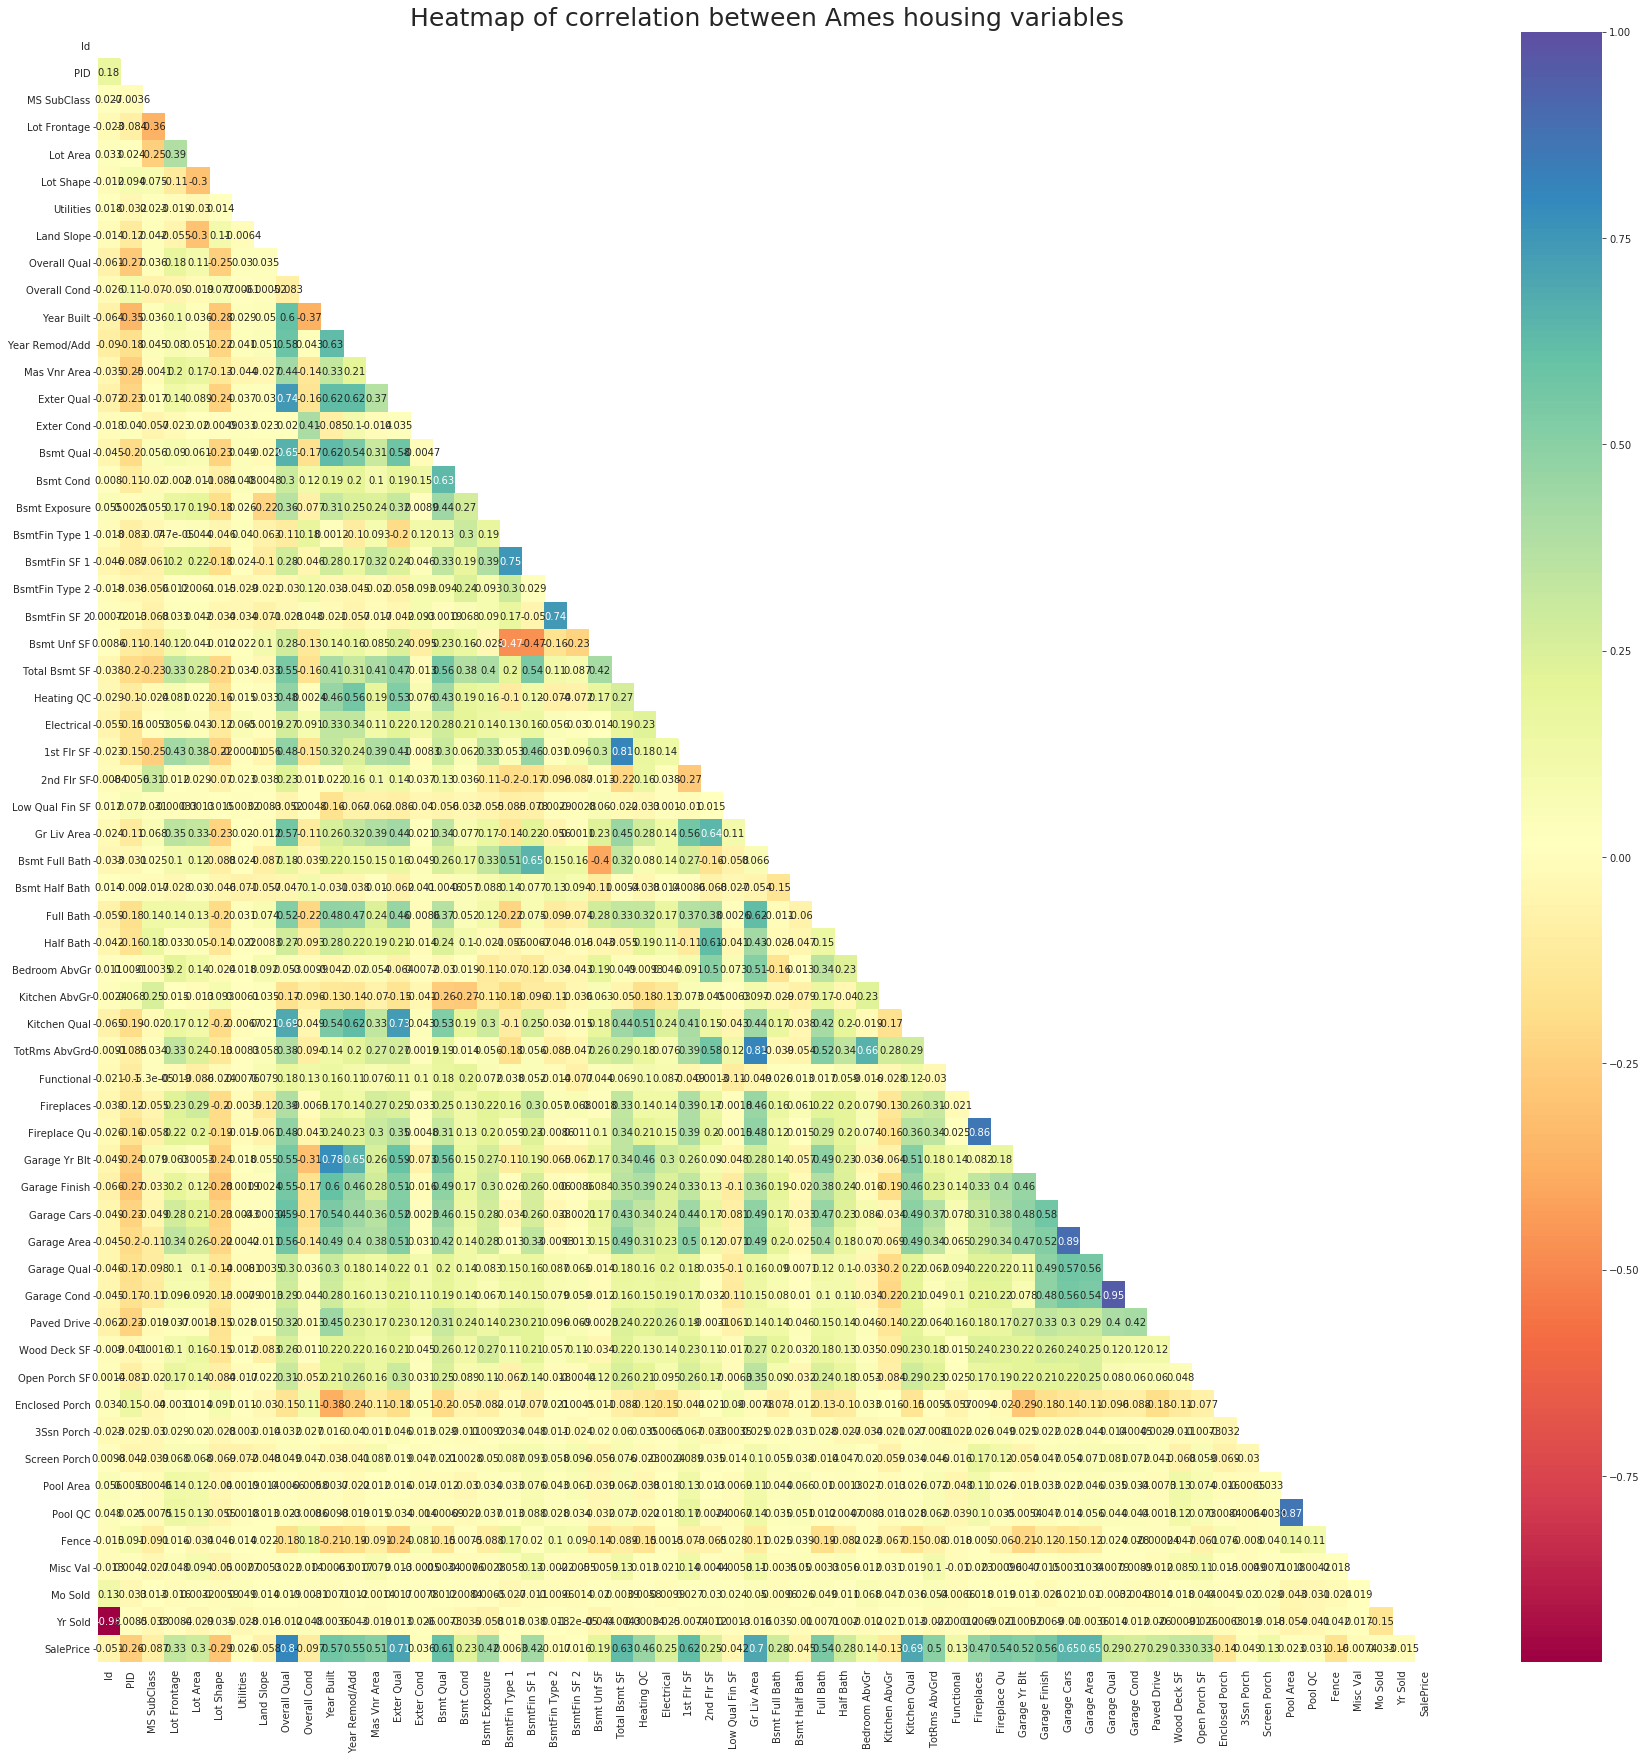

In [2170]:
# Use training data set and get the correlation of the numberic variables with the heat map

plt.figure(figsize=(30,30))

mask = np.zeros_like(train_df.corr())
#mask 
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(train_df.corr(),mask=mask, annot=True,cmap='Spectral') 
    ax.set_title("Heatmap of correlation between Ames housing variables", fontsize=25);

In [2171]:
# To better see the values of correlation
train_df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.800207
Exter Qual         0.712146
Gr Liv Area        0.697038
Kitchen Qual       0.692336
Garage Area        0.650247
Garage Cars        0.648199
Total Bsmt SF      0.628677
1st Flr SF         0.618486
Bsmt Qual          0.612188
Year Built         0.571849
Garage Finish      0.557839
Year Remod/Add     0.550370
Fireplace Qu       0.538925
Full Bath          0.537969
Garage Yr Blt      0.517962
Mas Vnr Area       0.508693
TotRms AbvGrd      0.504014
Fireplaces         0.471093
Heating QC         0.458354
Bsmt Exposure      0.424863
BsmtFin SF 1       0.423346
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Frontage       0.325955
Lot Area           0.296566
Paved Drive        0.290472
Garage Qual        0.285281
Bsmt Full Bath     0.283429
Half Bath          0.283001
Garage Cond        0.265021
2nd Flr SF         0.248452
Electrical         0.247842
Bsmt Cond          0.225075
Bsmt Unf SF        0.190144
Bedroom AbvGr      0

In [2172]:
# Choose greater than 0.5 correlation variables - 
#Overall Qual, Exter Qual, Gr Liv Area, Kitchen Qual, Garage Area, Garage Cars, Total Bsmt SF, 1st Flr SF, Bsmt Qual, Year Built, Garage Finish, Year Remod/Add, Fireplace Qu, Full Bath, Garage Yr Blt,  Mas Vnr Area, TotRms AbvGrd

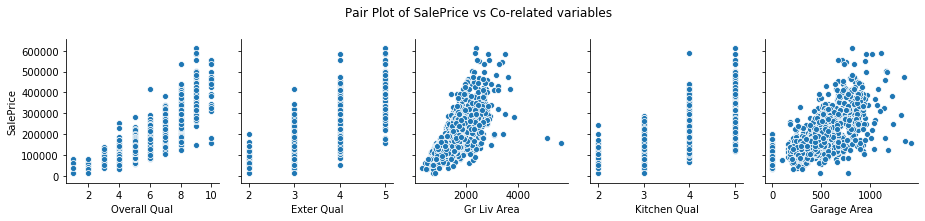

In [2173]:
# PairPlot of Sale Price vs Co-related variables
sns.pairplot(train_df, y_vars=['SalePrice'], x_vars=['Overall Qual', 'Exter Qual', 'Gr Liv Area', 'Kitchen Qual', 'Garage Area'])
plt.suptitle('Pair Plot of SalePrice vs Co-related variables');
plt.subplots_adjust(left=None, bottom=0, right=None, top=0.8, wspace=None, hspace=None)

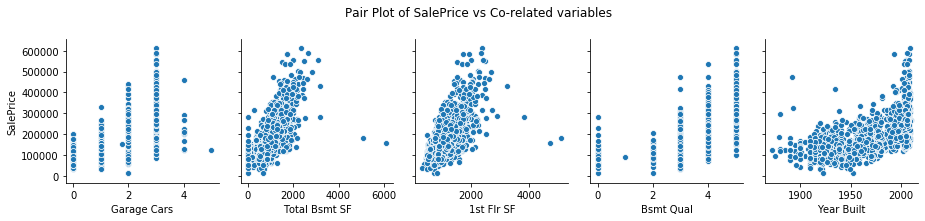

In [2174]:
# PairPlot of Sale Price vs Co-related variables
sns.pairplot(train_df, y_vars=['SalePrice'], x_vars=['Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Bsmt Qual', 'Year Built'])
plt.suptitle('Pair Plot of SalePrice vs Co-related variables');
plt.subplots_adjust(left=None, bottom=0, right=None, top=0.8, wspace=None, hspace=None)

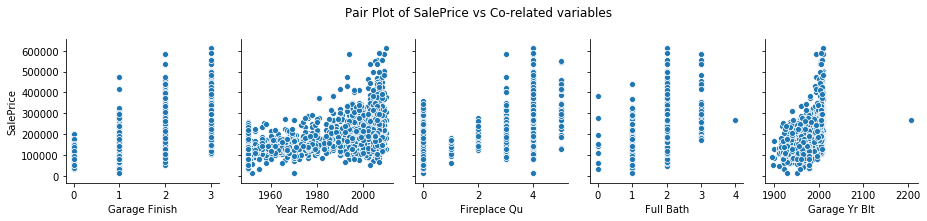

In [2175]:
# PairPlot of Sale Price vs Co-related variables
sns.pairplot(train_df, y_vars=['SalePrice'], x_vars=['Garage Finish', 'Year Remod/Add', 'Fireplace Qu', 'Full Bath', 'Garage Yr Blt'])
plt.suptitle('Pair Plot of SalePrice vs Co-related variables');
plt.subplots_adjust(left=None, bottom=0, right=None, top=0.8, wspace=None, hspace=None)

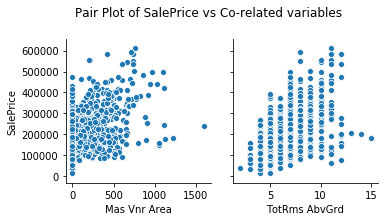

In [2176]:
# PairPlot of Sale Price vs Co-related variables
sns.pairplot(train_df, y_vars=['SalePrice'], x_vars=['Mas Vnr Area', 'TotRms AbvGrd'])
plt.suptitle('Pair Plot of SalePrice vs Co-related variables');
plt.subplots_adjust(left=None, bottom=0, right=None, top=0.8, wspace=None, hspace=None)

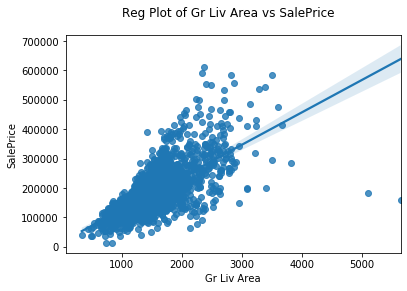

In [2177]:
# Plot of Gr Liv Area vs Sale Price
sns.regplot(train_df['Gr Liv Area'], train_df['SalePrice'])
plt.suptitle('Reg Plot of Gr Liv Area vs SalePrice');

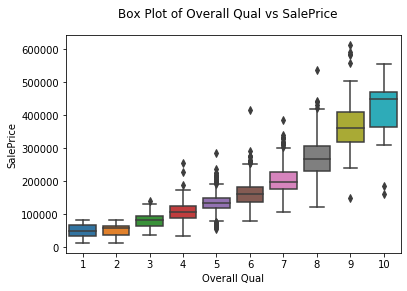

In [2178]:
# Plot of Overall Qual vs Sale Price
sns.boxplot(x='Overall Qual', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of Overall Qual vs SalePrice');

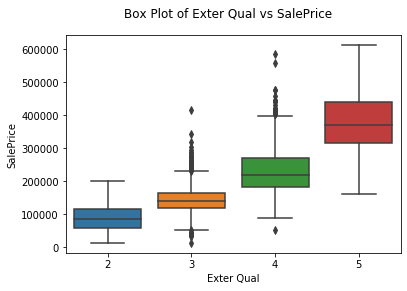

In [2179]:
# Plot of Exter Qual vs Sale Price
sns.boxplot(x='Exter Qual', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of Exter Qual vs SalePrice');

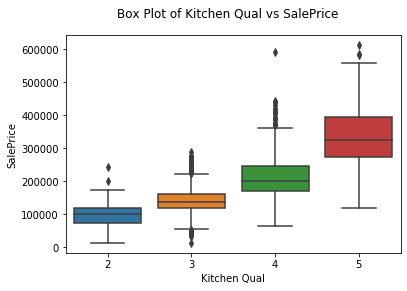

In [2180]:
# Plot of Kitchen Qual vs Sale Price
sns.boxplot(x='Kitchen Qual', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of Kitchen Qual vs SalePrice');

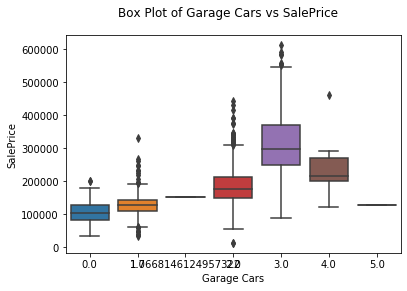

In [2181]:
# Plot of Garage Cars vs Sale Price
sns.boxplot(x='Garage Cars', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of Garage Cars vs SalePrice');

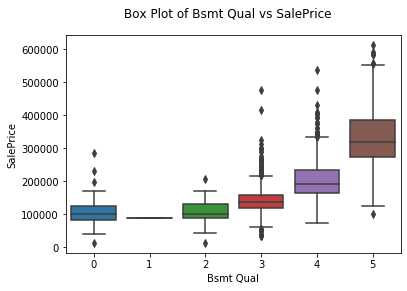

In [2182]:
# Plot of Bsmt Qual vs Sale Price
sns.boxplot(x='Bsmt Qual', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of Bsmt Qual vs SalePrice');

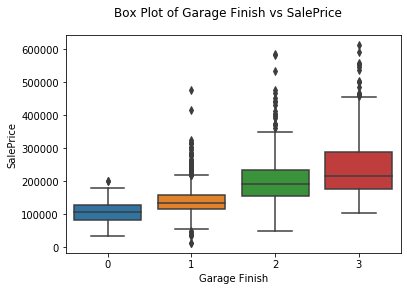

In [2183]:
# Plot of Garage Finish vs Sale Price
sns.boxplot(x='Garage Finish', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of Garage Finish vs SalePrice');

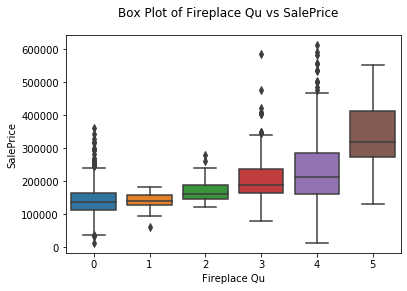

In [2184]:
# Plot of Fireplace Qu vs Sale Price
sns.boxplot(x='Fireplace Qu', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of Fireplace Qu vs SalePrice');

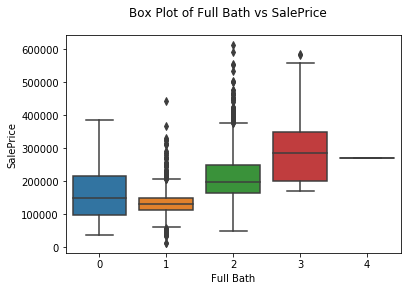

In [2185]:
# Plot of Full Bath vs Sale Price
sns.boxplot(x='Full Bath', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of Full Bath vs SalePrice');

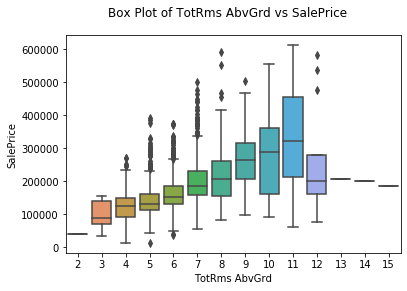

In [2186]:
# Plot of TotRms AbvGrd vs Sale Price
sns.boxplot(x='TotRms AbvGrd', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of TotRms AbvGrd vs SalePrice');
# Although there is variation in the mean, 'TotRms AbvGrd' has a positive corelation with Gr Liv Area.
# We will not use this as a predictor

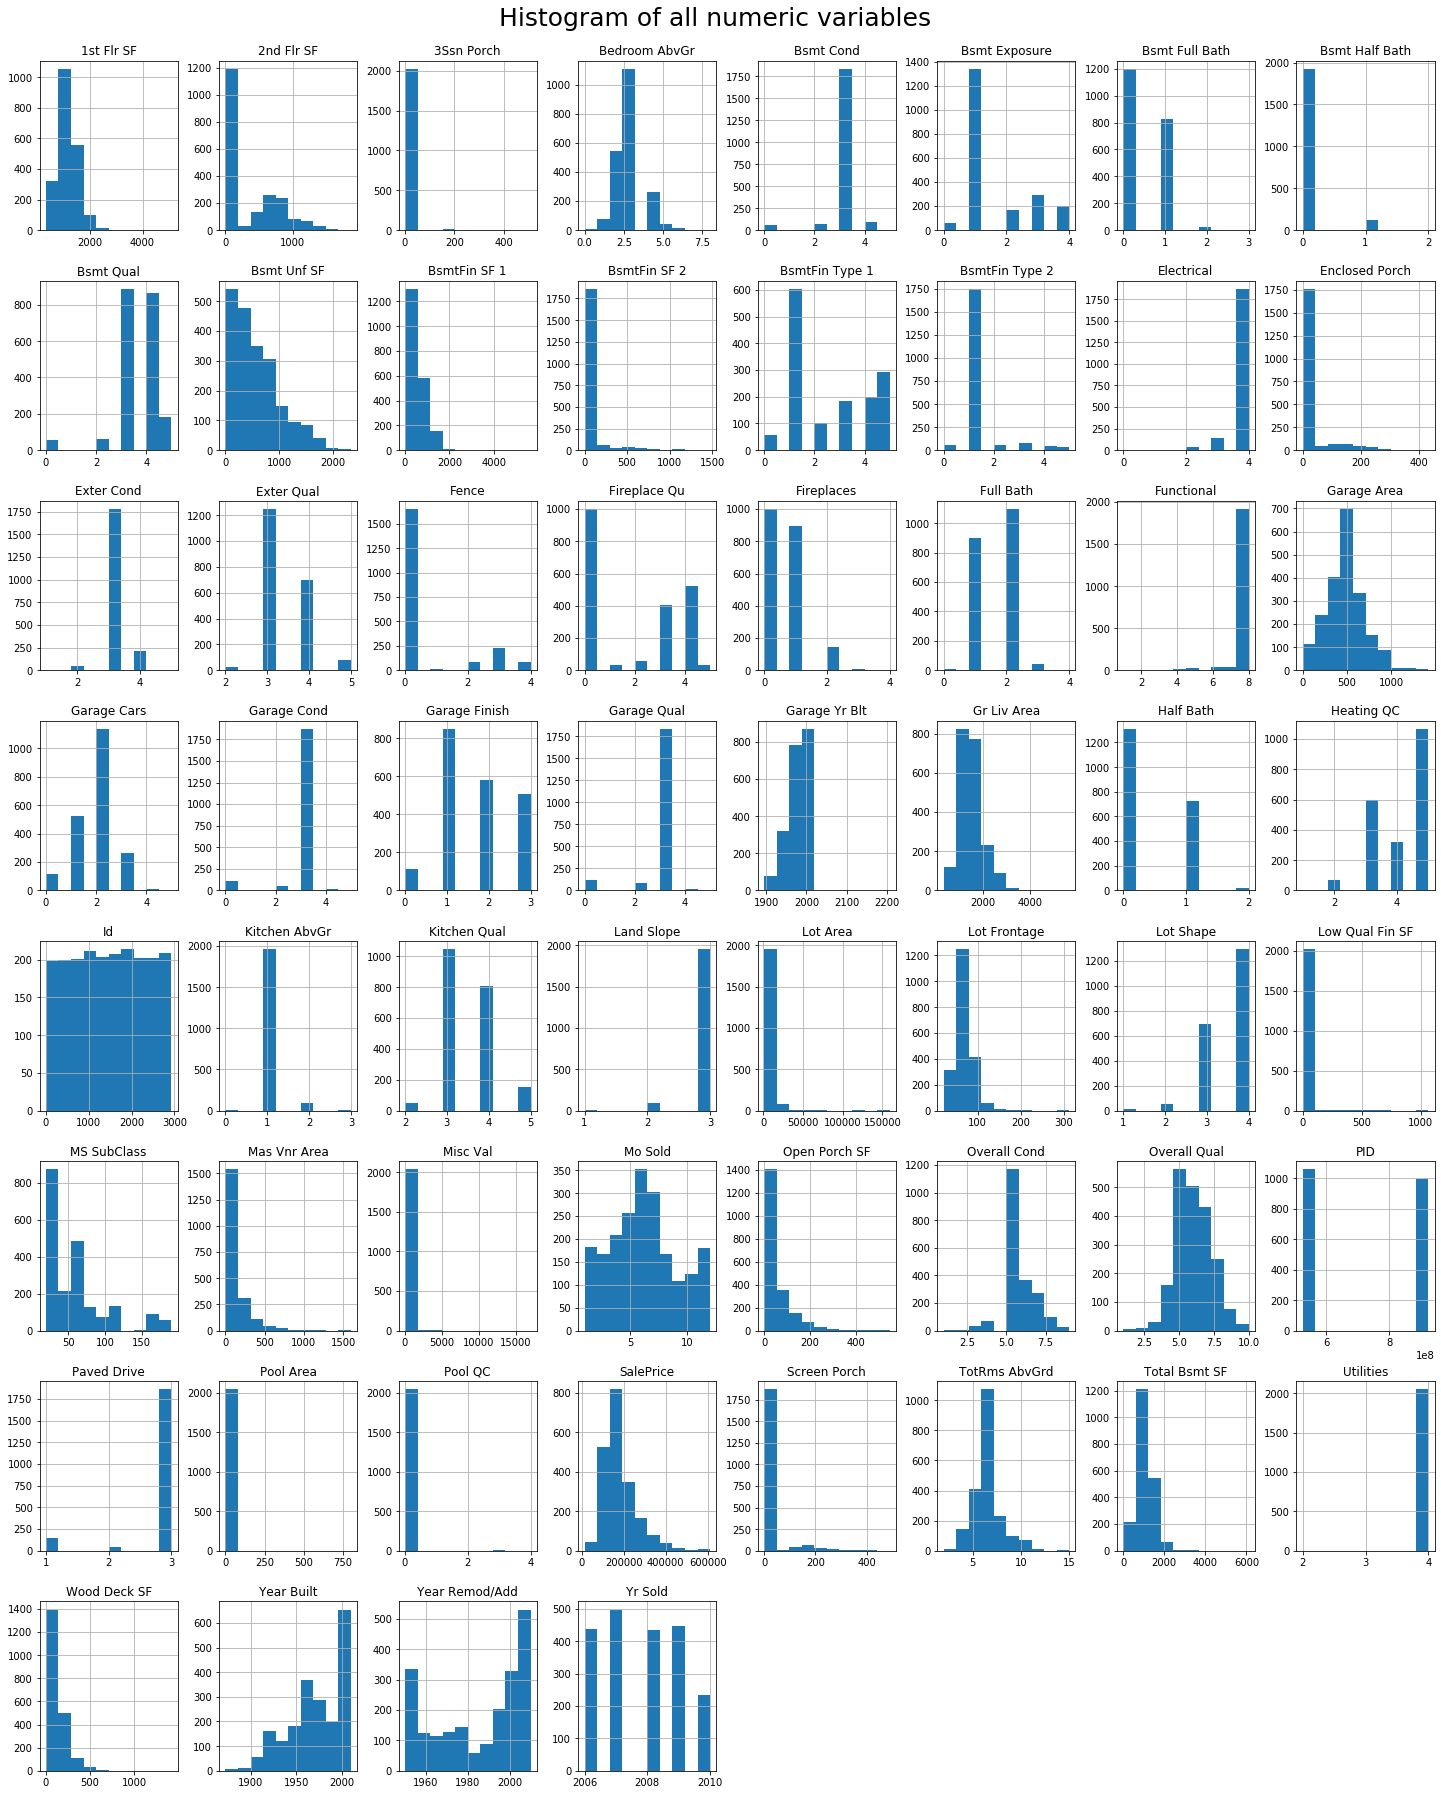

In [2187]:
# Plot of Histogram of all numeric variables
train_df.hist(figsize=(25, 25))
plt.suptitle('Histogram of all numeric variables', size=25);
plt.subplots_adjust(left=None, bottom=0, right=None, top=0.95, wspace=None, hspace=None)
# We can observe that 'Garage Area' and 'Overall Qual' resembles the most to a normal distribution

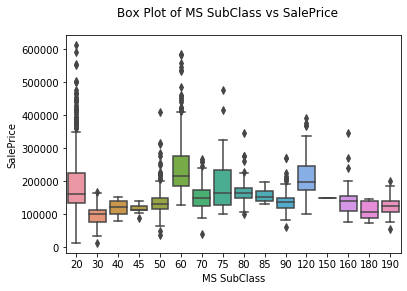

In [2188]:
# Plot of MS SubClass vs Sale Price
sns.boxplot(x='MS SubClass', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of MS SubClass vs SalePrice');

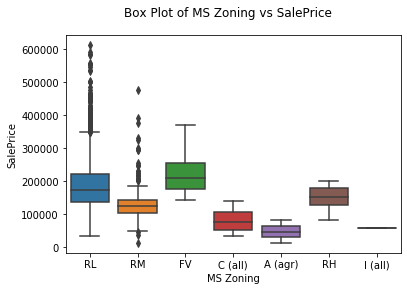

In [2189]:
# Plot of MS Zoning vs Sale Price
sns.boxplot(x='MS Zoning', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of MS Zoning vs SalePrice');
# MS Zoning is not a good predictor as there are alot of outliers for Pavement

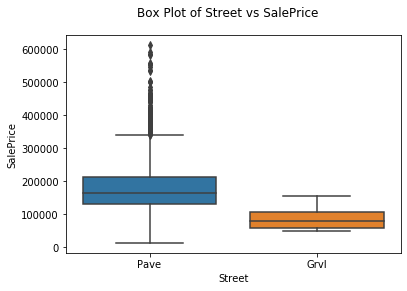

In [2190]:
# Plot of Street vs Sale Price
sns.boxplot(x='Street', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of Street vs SalePrice');
# Street is not a good predictor as there are alot of outliers for Pavement

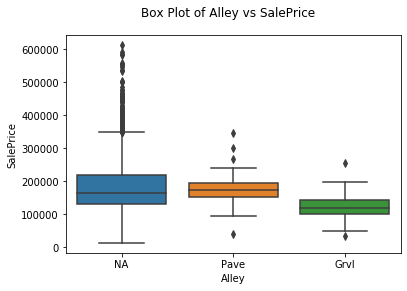

In [2191]:
# Plot of Alley vs Sale Price
sns.boxplot(x='Alley', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of Alley vs SalePrice');
# Alley is not a good predictor as there are not much variations in their means

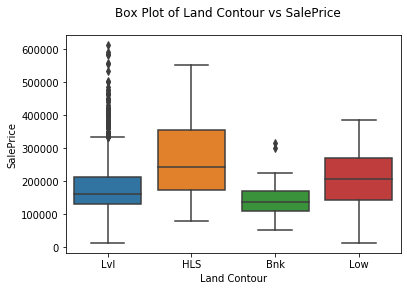

In [2192]:
# Plot of Land Contour vs Sale Price
sns.boxplot(x='Land Contour', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of Land Contour vs SalePrice');
# Land Contour is not a good predictor as there are too many outliers for Lvl

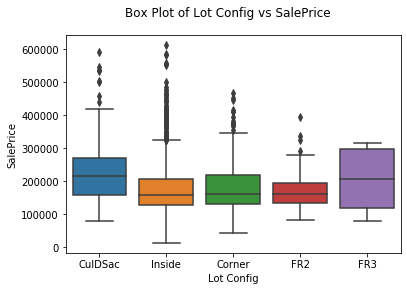

In [2193]:
# Plot of Land Config vs Sale Price
sns.boxplot(x='Lot Config', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of Lot Config vs SalePrice');
# Land Config is not a good predictor as there are too many outliers and not much variations in the means for Inside, Corner Lot Config, FR2

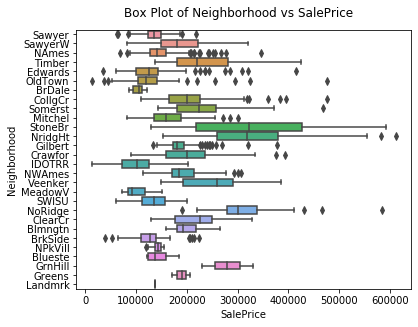

In [2194]:
# Plot of Neighborhood vs Sale Price
sns.boxplot(x='SalePrice', y='Neighborhood', data=train_df)
plt.suptitle('Box Plot of Neighborhood vs SalePrice');
plt.subplots_adjust(left=None, bottom=0, right=None, top=0.90, wspace=None, hspace=None)
# Neighborhood is a good predictor as there are variations for the means

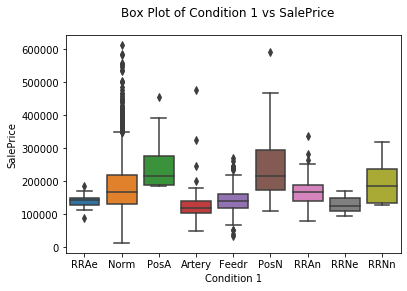

In [2195]:
# Plot of Condition 1 vs Sale Price
sns.boxplot(x='Condition 1', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of Condition 1 vs SalePrice');
# Condition 1 is not a good predictor as there are too many outliers for 'Norm'

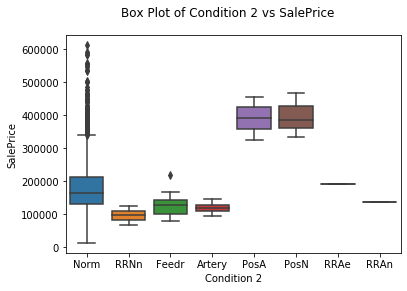

In [2196]:
# Plot of Condition 2 vs Sale Price
sns.boxplot(x='Condition 2', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of Condition 2 vs SalePrice');
# Condition 2 is not a good predictor as there are too many outliers for 'Norm'

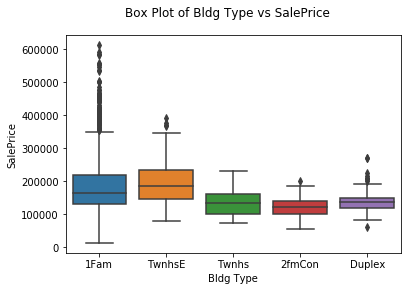

In [2197]:
# Plot of Bldg Type vs Sale Price
sns.boxplot(x='Bldg Type', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of Bldg Type vs SalePrice');
# Bldg Type is not a good predictor as there are too many outliers for '1Fam' and not much variations in their means

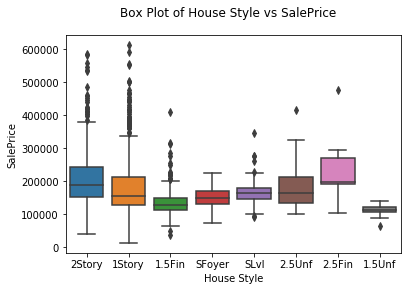

In [2198]:
# Plot of House Style vs Sale Price
sns.boxplot(x='House Style', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of House Style vs SalePrice');
# House Style is not a good predictor as there are too many outliers and not much variations in their means

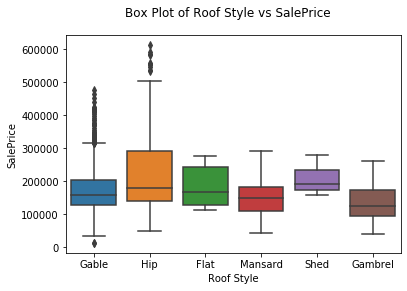

In [2199]:
# Plot of Roof Style vs Sale Price
sns.boxplot(x='Roof Style', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of Roof Style vs SalePrice');
# Roof Style is not a good predictor as there are too many outliers and not much variations in their means

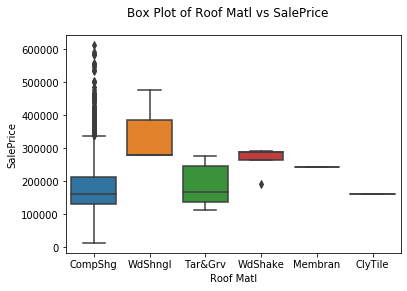

In [2200]:
# Plot of Roof Matl vs Sale Price
sns.boxplot(x='Roof Matl', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of Roof Matl vs SalePrice');
# Roof Matl is not a good predictor as there are too many outliers for CompShg and not much range for Membran and ClyTile

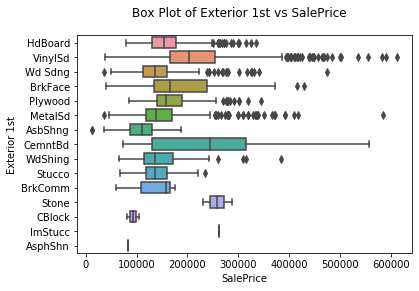

In [2201]:
# Plot of Exterior 1st vs Sale Price
sns.boxplot(x='SalePrice', y='Exterior 1st', data=train_df)
plt.suptitle('Box Plot of Exterior 1st vs SalePrice');
# Exterior 1st is not a good predictor as there are too many outliers

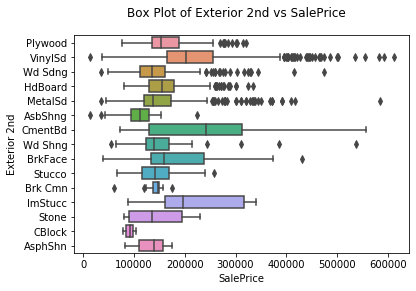

In [2202]:
# Plot of Exterior 2nd vs Sale Price
sns.boxplot(x='SalePrice', y='Exterior 2nd', data=train_df)
plt.suptitle('Box Plot of Exterior 2nd vs SalePrice');
# Exterior 2nd is not a good predictor as there are too many outliers

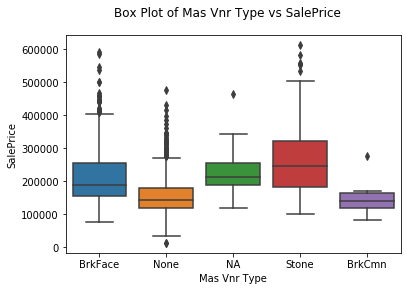

In [2203]:
# Plot of Mas Vnr Type vs Sale Price
sns.boxplot(x='Mas Vnr Type', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of Mas Vnr Type vs SalePrice');
# Not using Mas Vnr Type as predictor variable as it has missing values in the data represented by 'NA' 

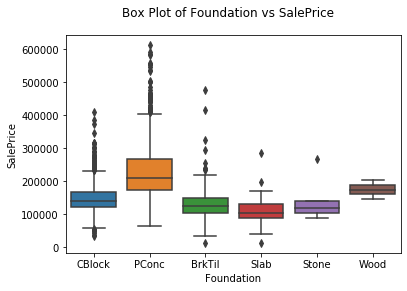

In [2204]:
# Plot of Foundation vs SalePrice
sns.boxplot(x='Foundation', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of Foundation vs SalePrice');
# Exterior 2nd is not a good predictor as there are too many outliers

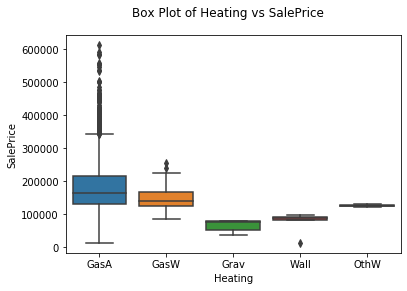

In [2205]:
# Plot of Heating vs Sale Price
sns.boxplot(x='Heating', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of Heating vs SalePrice');
# Heating is not a good predictor as there are too many outliers

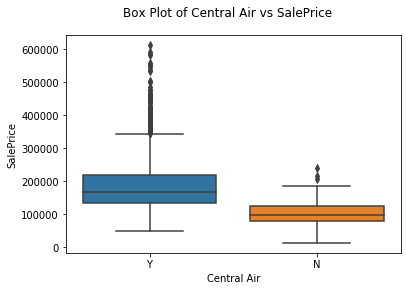

In [2206]:
# Plot of Central Air vs Sale Price
sns.boxplot(x='Central Air', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of Central Air vs SalePrice');
# Central Air is not a good predictor as there are too many outliers

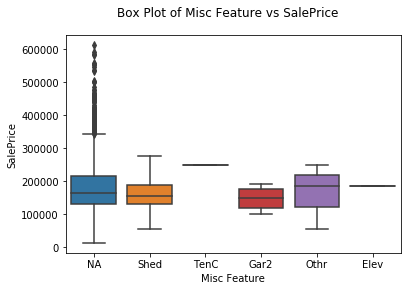

In [2207]:
# Plot of Misc Feature vs Sale Price
sns.boxplot(x='Misc Feature', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of Misc Feature vs SalePrice');
# Misc Feature is not a good predictor as there are too many outliers for NA and not much variations in their means

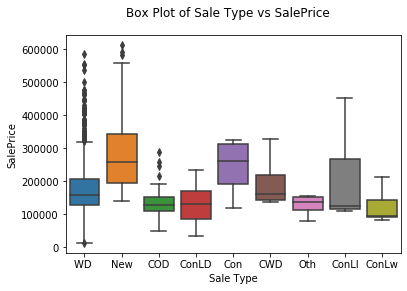

In [2208]:
# Plot of Sale Type vs Sale Price
sns.boxplot(x='Sale Type', y='SalePrice', data=train_df)
plt.suptitle('Box Plot of Sale Type vs SalePrice');
# Sale Type is not a good predictor as there are too many outliers

In [2209]:
# Create dummy coloumns to represent the nominal variables
combined_df = pd.get_dummies(combined_df, columns=['Neighborhood'], drop_first=True)

In [2210]:
# Split back and assign test data
test_df = pd.DataFrame(combined_df.loc[combined_df['SalePrice']==0])

In [2211]:
# Drop 'SalePrice' column and check dataframe
test_df.drop(['SalePrice'], axis=1, inplace=True)
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
2051,2658,902301120,190,RM,69.00000,9142,Pave,Grvl,4,Lvl,4,Inside,3,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,Stone,2,3,1,1.0,0.0,1.0,0.0,1020.0,1020.0,GasA,...,0,60,112,0,0,0,0,0,NA,0,4,2006,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2052,2718,905108090,90,RL,69.22459,9662,Pave,NA,3,Lvl,4,Inside,3,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,4,3,1,1.0,0.0,1.0,0.0,1967.0,1967.0,GasA,...,170,0,0,0,0,0,0,0,NA,0,8,2006,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2053,2414,528218130,60,RL,58.00000,17104,Pave,NA,3,Lvl,4,Inside,3,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,4,3,NaN,554.0,1.0,0.0,100.0,654.0,GasA,...,100,24,0,0,0,0,0,0,NA,0,9,2006,New,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2054,1989,902207150,30,RM,60.00000,8520,Pave,NA,4,Lvl,4,Inside,3,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,4,3,CBlock,3,3,1,1.0,0.0,1.0,0.0,968.0,968.0,GasA,...,0,0,184,0,0,0,0,0,NA,0,7,2007,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2055,625,535105100,20,RL,69.22459,9500,Pave,NA,3,Lvl,4,Inside,3,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,3,CBlock,4,3,1,4.0,609.0,1.0,0.0,785.0,1394.0,GasA,...,0,76,0,0,185,0,0,0,NA,0,7,2009,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [2212]:
# Split back and assign train data
train_df = pd.DataFrame(combined_df.loc[combined_df['SalePrice']!=0])

In [2213]:
# check dataframe
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,109,533352170,60,RL,69.22459,13517,Pave,NA,3,Lvl,4,CulDSac,3,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,NaN,533.0,1.0,0.0,192.0,725.0,GasA,...,44,0,0,0,0,0,0,NA,0,3,2010,WD,130500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,43.00000,11492,Pave,NA,3,Lvl,4,CulDSac,3,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,NaN,637.0,1.0,0.0,276.0,913.0,GasA,...,74,0,0,0,0,0,0,NA,0,4,2009,WD,220000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,153,535304180,20,RL,68.00000,7922,Pave,NA,4,Lvl,4,Inside,3,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,1,NaN,731.0,1.0,0.0,326.0,1057.0,GasA,...,52,0,0,0,0,0,0,NA,0,1,2010,WD,109000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,318,916386060,60,RL,73.00000,9802,Pave,NA,4,Lvl,4,Inside,3,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1.0,0.0,1.0,0.0,384.0,384.0,GasA,...,0,0,0,0,0,0,0,NA,0,4,2010,WD,174000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,255,906425045,50,RL,82.00000,14235,Pave,NA,3,Lvl,4,Inside,3,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,1,1.0,0.0,1.0,0.0,676.0,676.0,GasA,...,59,0,0,0,0,0,0,NA,0,3,2010,WD,138500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [2214]:
# Set the predictor variables and the target
X = train_df[['Overall Qual', 'Exter Qual', 'Gr Liv Area', 'Kitchen Qual', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Bsmt Qual', 'Year Built', 'Garage Finish', 'Year Remod/Add', 'Fireplace Qu', 'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area', 'Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_CollgCr','Neighborhood_Crawfor','Neighborhood_Edwards','Neighborhood_Gilbert','Neighborhood_Greens','Neighborhood_GrnHill','Neighborhood_IDOTRR','Neighborhood_Landmrk','Neighborhood_MeadowV','Neighborhood_Mitchel','Neighborhood_NAmes','Neighborhood_NPkVill','Neighborhood_NWAmes','Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_OldTown','Neighborhood_SWISU','Neighborhood_Sawyer','Neighborhood_SawyerW','Neighborhood_Somerst','Neighborhood_StoneBr','Neighborhood_Timber','Neighborhood_Veenker']]
y = train_df['SalePrice']

In [2215]:
# Instanize the regression model
lr = LinearRegression()

In [2216]:
# Instanize the lasso model
lasso = LassoCV(n_alphas=200)

In [2217]:
# Instanize the ridge model
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [2218]:
# Do a train-test-split on the train data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42)

In [2219]:
# Instanize Standard Scaler and fit & transform the model for X train, transform for X valid
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_valid_scaled = ss.transform(X_valid)

In [2220]:
# Check X trained scaled
X_train_scaled

array([[-0.07694683, -0.68763476,  0.17675569, ..., -0.13862909,
        -0.14807738, -0.0808981 ],
       [ 0.62331488, -0.68763476,  1.51726929, ..., -0.13862909,
        -0.14807738, -0.0808981 ],
       [-0.77720855, -0.68763476, -1.24852569, ..., -0.13862909,
        -0.14807738, -0.0808981 ],
       ...,
       [-0.07694683, -0.68763476, -0.37127782, ..., -0.13862909,
        -0.14807738, -0.0808981 ],
       [-0.07694683, -0.68763476, -1.00605044, ..., -0.13862909,
        -0.14807738, -0.0808981 ],
       [ 0.62331488,  1.02643698,  0.05453239, ..., -0.13862909,
        -0.14807738, -0.0808981 ]])

In [2221]:
# fit lasso model with X train, y train to get optimized alpha
lasso.fit(X_train_scaled,y_train)
lasso.alpha_

427.0431747748727

In [2222]:
# Cross validate and obtain R2 score for lr
cross_val_score(lr, X_train_scaled, y_train, cv=10).mean()

0.7710669452446718

In [2223]:
# Cross validate and obtain R2 score for lasso
cross_val_score(lasso, X_train_scaled, y_train, cv=10).mean()

0.8144933282848879

In [2224]:
# Cross validate and obtain R2 score for ridge
cross_val_score(ridge, X_train_scaled, y_train, cv=10).mean()

0.8134617462678015

In [2225]:
# The best model seem to be lasso. We will try to fit lasso model with optimized alpha
lasso = LassoCV(n_alphas=427)

In [2226]:
# Cross validate and obtain R2 score for lasso with optimized alpha
cross_val_score(lasso, X_train_scaled, y_train, cv=10).mean()
#there is a slight improvement

0.8145039010605364

In [2227]:
# Cross validate and obtain R2 score for X valid scaled and y valid
cross_val_score(lasso, X_valid_scaled, y_valid, cv=10).mean()

0.8586699092479086

In [2228]:
# Fit lasso model with X train, y train
model = lasso.fit(X_train_scaled, y_train)

In [2229]:
# Obtain score for R2
model.score(X_valid_scaled, y_valid)

0.8669102494867365

In [2230]:
# Set the predictor variables and the target for test data
X_test = test_df[['Overall Qual', 'Exter Qual', 'Gr Liv Area', 'Kitchen Qual', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Bsmt Qual', 'Year Built', 'Garage Finish', 'Year Remod/Add', 'Fireplace Qu', 'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area', 'Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_CollgCr','Neighborhood_Crawfor','Neighborhood_Edwards','Neighborhood_Gilbert','Neighborhood_Greens','Neighborhood_GrnHill','Neighborhood_IDOTRR','Neighborhood_Landmrk','Neighborhood_MeadowV','Neighborhood_Mitchel','Neighborhood_NAmes','Neighborhood_NPkVill','Neighborhood_NWAmes','Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_OldTown','Neighborhood_SWISU','Neighborhood_Sawyer','Neighborhood_SawyerW','Neighborhood_Somerst','Neighborhood_StoneBr','Neighborhood_Timber','Neighborhood_Veenker']]
X_test_scaled = ss.transform(X_test)

In [2231]:
# Obtain predicted y test results
prediction = lasso.predict(X_test_scaled)

In [2232]:
# Check values
[[prediction]]

[[array([128238.97245359, 187879.93643665, 200858.87692507, 125337.0114637 ,
         178943.07764499,  92928.51843577, 104221.3288871 , 148596.51623415,
         204440.79504701, 156980.72497594, 175116.47960213, 122825.13488068,
         156999.7655513 , 250587.48144765, 164572.51860895, 118144.79869904,
         153901.53191135, 109245.92444442, 185048.32457466, 196362.01716565,
         141277.15087594, 122012.42406118, 204003.41139315, 156513.43865828,
         191279.79949808, 110595.30129698, 149788.44326815, 142652.71857233,
         150153.79821528,  45800.88900979, 110426.09654378, 106055.7960331 ,
         245301.72522634, 158337.06571973, 222722.74963703, 179554.41161826,
         113224.82462944,  73193.42951376, 137233.84003156, 200997.71243386,
         175552.10997911, 216960.34209682, 158564.56376819, 157608.21841669,
         238260.22894507, 106308.7597707 , 222745.05599948, 108373.90063816,
         118572.13172831, 119031.8596252 , 102910.32489593, 207114.18226425,

In [2233]:
# Check the shape
prediction.shape

(879,)

In [2234]:
# Create data series 'SalePrice' in test dataset and assign predicted values to it
test_df['SalePrice'] = prediction

In [2235]:
# Check dataframe for entry
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,SalePrice
2051,2658,902301120,190,RM,69.00000,9142,Pave,Grvl,4,Lvl,4,Inside,3,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,Stone,2,3,1,1.0,0.0,1.0,0.0,1020.0,1020.0,GasA,...,60,112,0,0,0,0,0,NA,0,4,2006,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,128238.972454
2052,2718,905108090,90,RL,69.22459,9662,Pave,NA,3,Lvl,4,Inside,3,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,4,3,1,1.0,0.0,1.0,0.0,1967.0,1967.0,GasA,...,0,0,0,0,0,0,0,NA,0,8,2006,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,187879.936437
2053,2414,528218130,60,RL,58.00000,17104,Pave,NA,3,Lvl,4,Inside,3,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,4,3,NaN,554.0,1.0,0.0,100.0,654.0,GasA,...,24,0,0,0,0,0,0,NA,0,9,2006,New,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200858.876925
2054,1989,902207150,30,RM,60.00000,8520,Pave,NA,4,Lvl,4,Inside,3,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,4,3,CBlock,3,3,1,1.0,0.0,1.0,0.0,968.0,968.0,GasA,...,0,184,0,0,0,0,0,NA,0,7,2007,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,125337.011464
2055,625,535105100,20,RL,69.22459,9500,Pave,NA,3,Lvl,4,Inside,3,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,3,CBlock,4,3,1,4.0,609.0,1.0,0.0,785.0,1394.0,GasA,...,76,0,0,185,0,0,0,NA,0,7,2009,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,178943.077645


In [2236]:
# Slice test data frame for 'Id' and 'SalePrice'
submit_df = test_df[['Id', 'SalePrice']]

In [2237]:
# Check dataframe for entry
submit_df.head()

,Id,SalePrice
2051,2658,128238.972454
2052,2718,187879.936437
2053,2414,200858.876925
2054,1989,125337.011464
2055,625,178943.077645


In [2238]:
# Set Id as the index
submit_df.set_index('Id',inplace=True)

In [2239]:
# Check dataframe for index
submit_df

,SalePrice
Id,
2658,128238.972454
2718,187879.936437
2414,200858.876925
1989,125337.011464
625,178943.077645
...,...
1662,175038.393020
1234,219806.177286
1373,134027.338275


In [2240]:
#Write dataframe to .csv file
submit_df.to_csv('./datasets/submittest3.csv')

## Conclusion:
### The best model is lasso regression. Optimizing the best alpha only improve the results slightly.
### The predictors 'Overall Quality', 'Exterior Quality' , 'Above grade (ground) living area square feet' and 'Kitchen Quality' can be used as factors to increase the sale price of a house as they have high co-relation with the sale price.

### I sent the results to Kaggle and the private score (uses 70% of test data) for Root Mean Square Error(RMSE) is 33281.29151 and the public score (uses 30% of test data) the RMSE is 34224.73121. 